In [1]:
# Import de librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
# CONSTANTES
TEST_SIZE = 0.2
ENTRY_TO_EXPLAIN = 1
DATA_FILE = './datasets/dataset.xlsx'
SHEET_NAME = 'method'
COMPLETE = 0

# Obtención de los datos

## Infomación de los datos

In [3]:
# Importado de los datos al dataframe 
df = pd.read_excel(DATA_FILE, sheet_name=SHEET_NAME)
df.head()

,Project,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,...,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs,Buggy
0,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.ClientTimeoutTest.testTim...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
1,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
4,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.spi.impl.ClusterListenerT...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108106 entries, 0 to 108105
Data columns (total 77 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Project                            108106 non-null  object
 1   Hash                               108106 non-null  object
 2   LongName                           108106 non-null  object
 3   CC                                 108106 non-null  int64 
 4   CCL                                108106 non-null  int64 
 5   CCO                                108106 non-null  int64 
 6   CI                                 108106 non-null  int64 
 7   CLC                                108106 non-null  int64 
 8   CLLC                               108106 non-null  int64 
 9   LDC                                108106 non-null  int64 
 10  LLDC                               108106 non-null  int64 
 11  HCPL                               108106 non-null  

In [5]:
# Comprobación de datos Null 
print('Valores Null: ',df.isnull().sum().sum())

Valores Null:  0


In [6]:
df.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs,Buggy
count,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,...,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000
mean,48471.978086,0.695678,3.466329,2.089051,41014.045946,40928.270790,8.137791,7.305145,337863.506938,168387.192968,...,0.048286,0.012867,0.004107,0.123582,0.125562,0.160518,0.061514,0.000009,0.407332,0.308253
std,172427.409064,12.179035,109.661563,57.401812,154578.129958,154664.341447,155.248762,142.051142,255770.652303,243969.885943,...,0.241290,0.168219,0.069500,0.465318,1.103327,0.411296,1.461401,0.003041,0.696521,0.461774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138568.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,266828.000000,4644.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,487291.000000,267361.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,999746.000000,499.000000,20934.000000,2463.000000,999487.000000,999487.000000,6691.000000,5848.000000,999596.000000,999818.000000,...,8.000000,15.000000,3.000000,14.000000,88.000000,10.000000,79.000000,1.000000,6.000000,1.000000


In [7]:
df['Buggy'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
108101    0
108102    0
108103    0
108104    0
108105    1
Name: Buggy, Length: 108106, dtype: int64>

## Valores duplicados y no relevantes

In [8]:
# Comprobación de filas duplicadas 
print('Filas duplicadas: ', df.duplicated().sum())
# Eliminación de las filas duplicadas
df = df.drop_duplicates()
# Comprobación de la eliminaciñon correcta de las filas duplicadas eliminadas
print( 'duplicated Values: ', df.duplicated().sum())

Filas duplicadas:  105
duplicated Values:  0


In [9]:
# Eliminación de columnas no apropiadas para el entrenamiento de los modelos
df = df.drop(['Project', 'Hash', 'LongName','Number of Bugs'], axis=1)
# Comprobación de los cambios realizados
df.head()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Buggy
0,0,0,0,0,0,0,0,0,148093,163636,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,212183,248,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,299316,36,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,349426,4386,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,0,0,0,0,513541,536364,...,0,0,0,0,0,0,1,0,0,1


In [10]:
# Cantidad de datos tras el tratado
df.shape

(108001, 73)

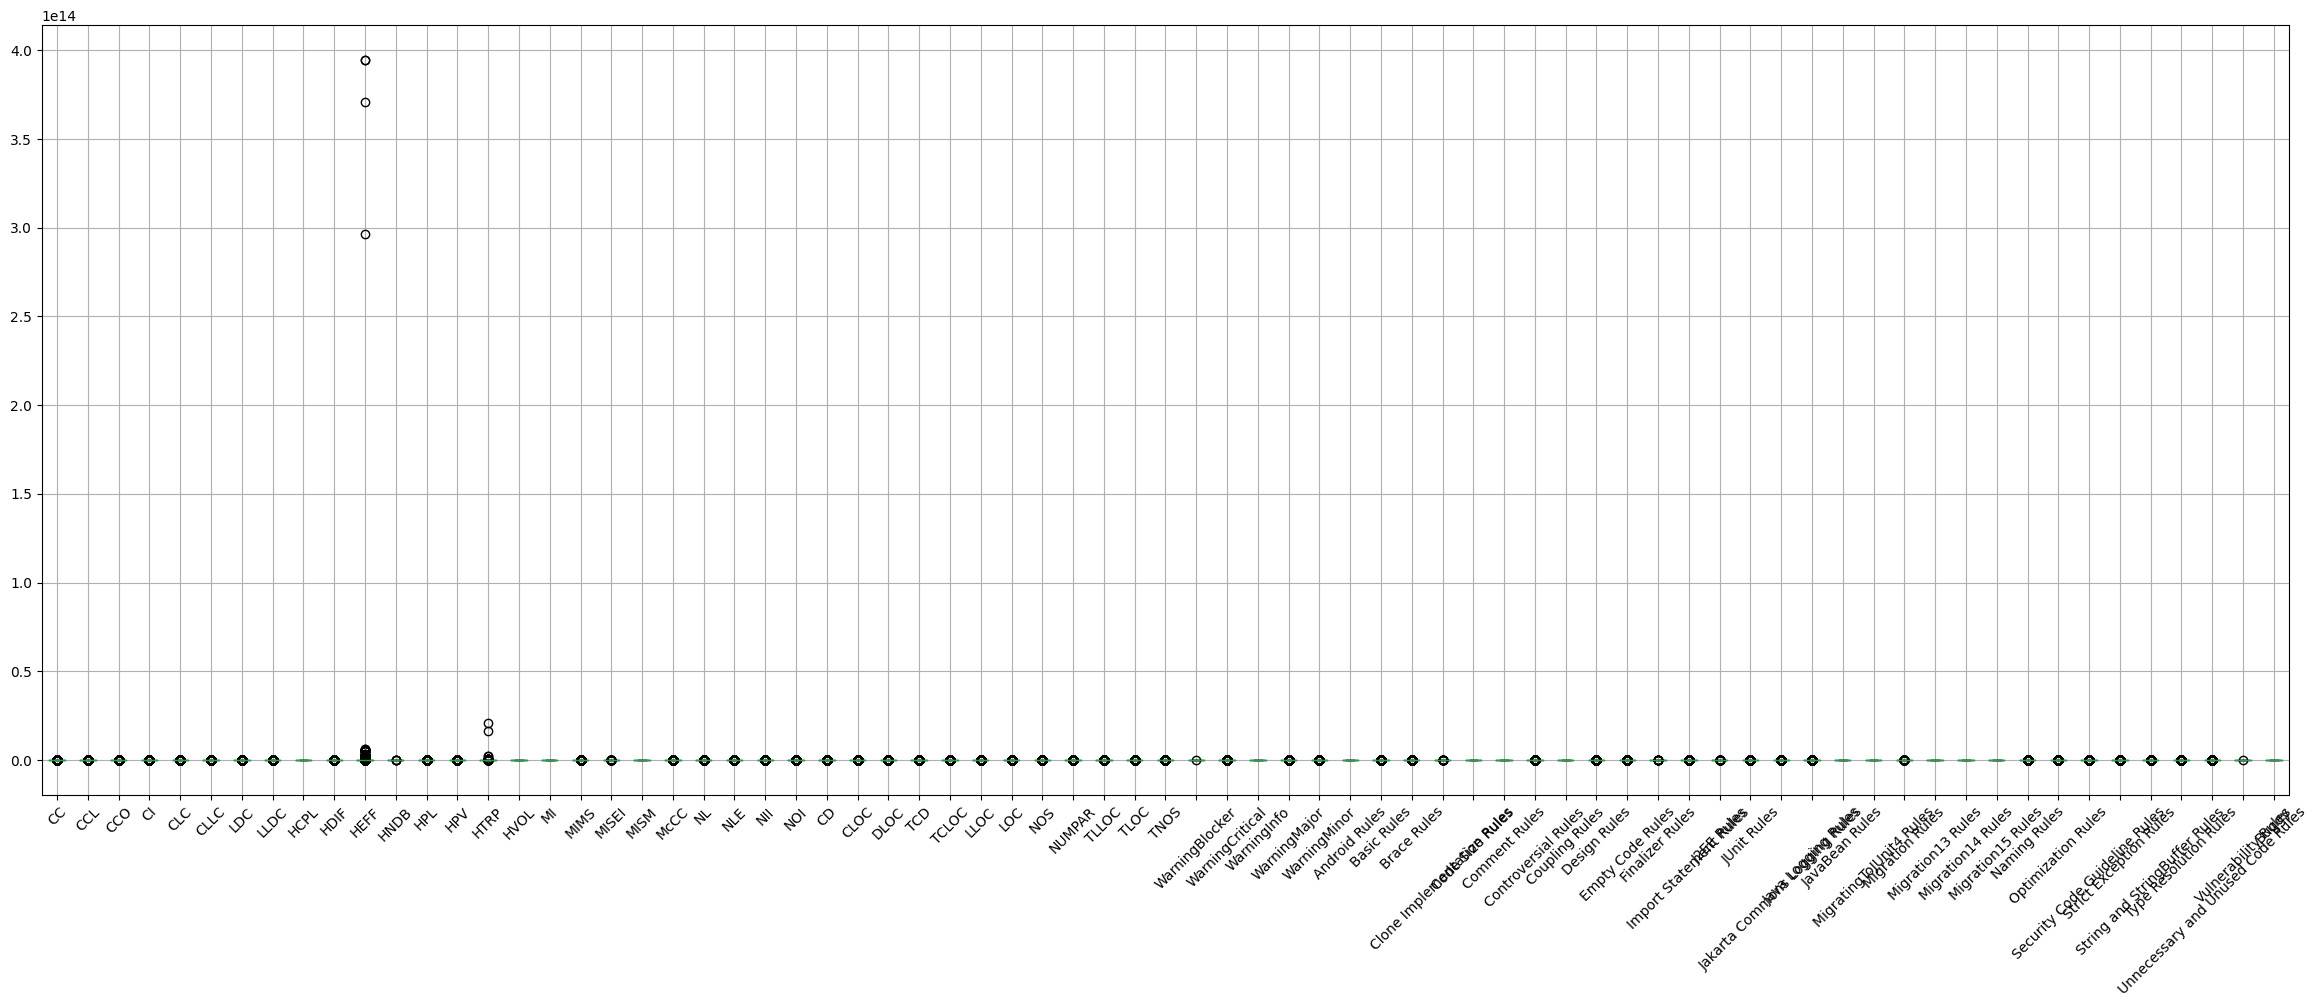

In [11]:
# Muestra de los valores atípicos para las features seleccionadas
plt.figure(figsize=(29,10))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

## Conjuntos de entrenamiento y test

In [12]:
# Separación de los valores de entrada para el entrenamiento del modelo y los valores de salida
x = df.drop('Buggy', axis=1)  # valores de entrada
y = df['Buggy']  # valores de salida

In [13]:
x

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Migration14 Rules,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules
0,0,0,0,0,0,0,0,0,148093,163636,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,212183,248,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,299316,36,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,349426,4386,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,513541,536364,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108101,0,0,0,0,0,0,0,0,118039,33,...,0,0,0,0,0,0,0,0,0,0
108102,0,0,0,0,0,0,0,0,213303,308571,...,0,0,0,0,0,1,0,0,0,0
108103,0,0,0,0,0,0,0,0,247176,303947,...,0,0,0,0,0,1,0,0,0,0
108104,0,0,0,0,0,0,0,0,193219,368,...,0,0,0,0,0,1,0,0,0,0


In [14]:
y

0         1
1         1
2         1
3         1
4         1
         ..
108101    0
108102    0
108103    0
108104    0
108105    1
Name: Buggy, Length: 108001, dtype: int64

In [15]:
# Normalizacion de los datos del dataframe
# Se elimina la media de los datos y se escalan los datos para que su varianza sea 1 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# División del dataframe en los conjuntos de test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=42)

# Creación del modelo Random Forest

## Ajuste de hiperparámetros y entrenamiento

![image.png](./img/Captura%20de%20pantalla%202023-05-06%20132600.png)

Antes de la construcción del modelo de random forest comprobamos los mejores hiperparámetros para el modelo.

Grid Search es una técnica de validación cruzada que ejecuta la combinación entre los parámetros introducidos como entrada para seleccionar la mejor combinación de estos.

HIPERPARÁMETROS: 
  - n_estimators: representa el número de estimadores (árboles de decisión en este caso) que se deben utilizar en el modelo
  - max_depth: indica la profundidad máxima de los árboles del modelo 
  - min_samples_split: determina el número de muestras requeridas para diidir un nodo en un árbol. Influye en la resistencia frente al ruido de los datos. 
  - max_features: controla el número máximo de características que se consideran al buscar la mejor deisión en un nodo del árbol 
  
PARÁMETROS: 
  - cv: indica la estrategia de validación cruzada seguida 
  - neg_root_mean_squared_error: error cuadrático medio expresado en su forma negativa 
  - r2: indica cuanto se explica la variabilidad de los datos a través del modelo de regresión. Sus valores oscilan entre 0 y 1, siendo mejores cuanto más próximos a 1 se encuentren   

In [16]:
rf = RandomForestClassifier(random_state = 42)

search_space = {
    "n_estimators": [300, 500, 800],
    "max_depth": [15, 35, 50],
    "min_samples_split": [3, 5],
    "max_features": [72, 75], 
}

GS = GridSearchCV(estimator = rf,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv = 5,
                 verbose = 4, 
                 n_jobs=-1)

#GS.fit(X_train, y_train)

#print(GS.best_params_)

'''
Resultados:
Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 35, 'max_features': 72, 'min_samples_split': 3, 'n_estimators': 500}
'''

"\nResultados:\nFitting 5 folds for each of 36 candidates, totalling 180 fits\n{'max_depth': 35, 'max_features': 72, 'min_samples_split': 3, 'n_estimators': 500}\n"

In [17]:
# Creación del modelo de random forest con los hiperparámetros seleccionados del paso anterior

# Modelo rápido para pruebas
# rf = RandomForestClassifier(max_depth= 35, max_features= 20, min_samples_split= 50, n_estimators= 300, n_jobs=-1)

# Modelo completo
rf = RandomForestClassifier(max_depth= 35, max_features= 72, min_samples_split= 3, n_estimators= 500, n_jobs=-1)

# Entrenado del modelo
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=35, max_features=72, min_samples_split=3,
                       n_estimators=500, n_jobs=-1)

## Evaluación del modelo

### Accuracy Score

In [18]:
# Comprobación de las predicciones realizadas con el modelo de random forest
y_pred = rf.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print('Accuracy Score: {:.2f} %'.format(precision * 100))
predicciones_correctas = accuracy_score(y_test, y_pred, normalize=False)
print('Predicciones correctas: {}'.format(predicciones_correctas))

Accuracy Score: 75.73 %
Predicciones correctas: 16358


### Confusion Matrix
Una confusion matrix es una forma de expresar cuántas predicciones de un clasificador fueron correctas y, cuando son incorrectas, dónde el clasificador se confundió (de ahí el nombre). En las matrices de confusión a continuación, las filas representan las etiquetas verdaderas y las columnas representan las etiquetas predichas. Los valores en la diagonal representan el número (o porcentaje, en una matriz de confusión normalizada) de veces en que la etiqueta predicha coincide con la etiqueta verdadera. Los valores en las otras celdas representan instancias donde el clasificador etiquetó incorrectamente una observación; la columna nos dice qué predijo el clasificador y la fila nos dice cuál era la etiqueta correcta. Esta es una forma conveniente de identificar áreas donde el modelo puede necesitar un poco de entrenamiento adicional.

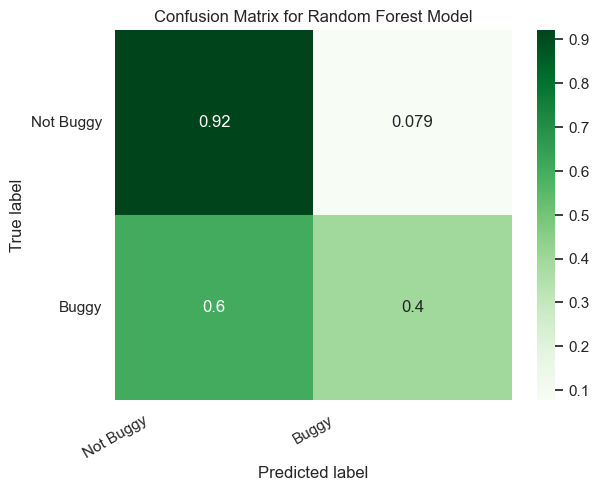

In [19]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Confusion matrix usando un heat map
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Greens)

# Labels 
class_names = ['Not Buggy', 'Buggy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=30)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#### Métricas de evaluación
##### Precision
Precision es el número de miembros de una clase que el modelo ha identificado correctamente dividido entre todas las veces que el modelo ha predicho esa clase.
##### Recall
La sensibilidad o recall es el número de miembros de una clase que el clasificador identificó correctamente dividido por el número total de miembros en esa clase.
##### F1 score
El F1 score es un poco menos intuitivo porque combina precisión y recall en una sola métrica. Si tanto la precisión como el recall son altos, F1 también será alto. Si ambos son bajos, F1 será bajo. Si uno es alto y el otro bajo, F1 será bajo. F1 es una forma rápida de saber si el clasificador es realmente bueno para identificar miembros de una clase, o si está encontrando atajos (por ejemplo, simplemente identificando todo como miembro de una clase grande).

In [20]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     14851
           1       0.70      0.40      0.51      6750

    accuracy                           0.76     21601
   macro avg       0.73      0.66      0.67     21601
weighted avg       0.75      0.76      0.73     21601



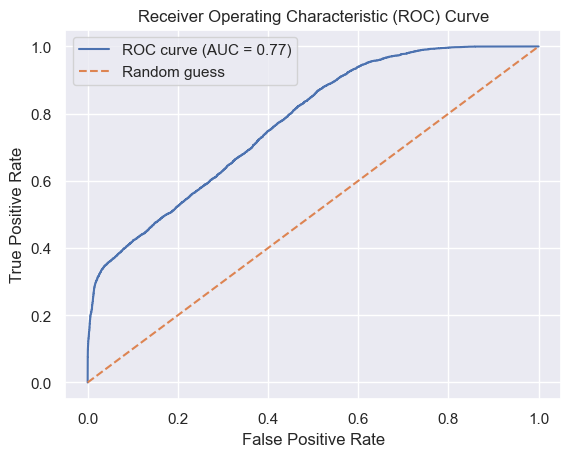

In [21]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()

## Importancia de las features

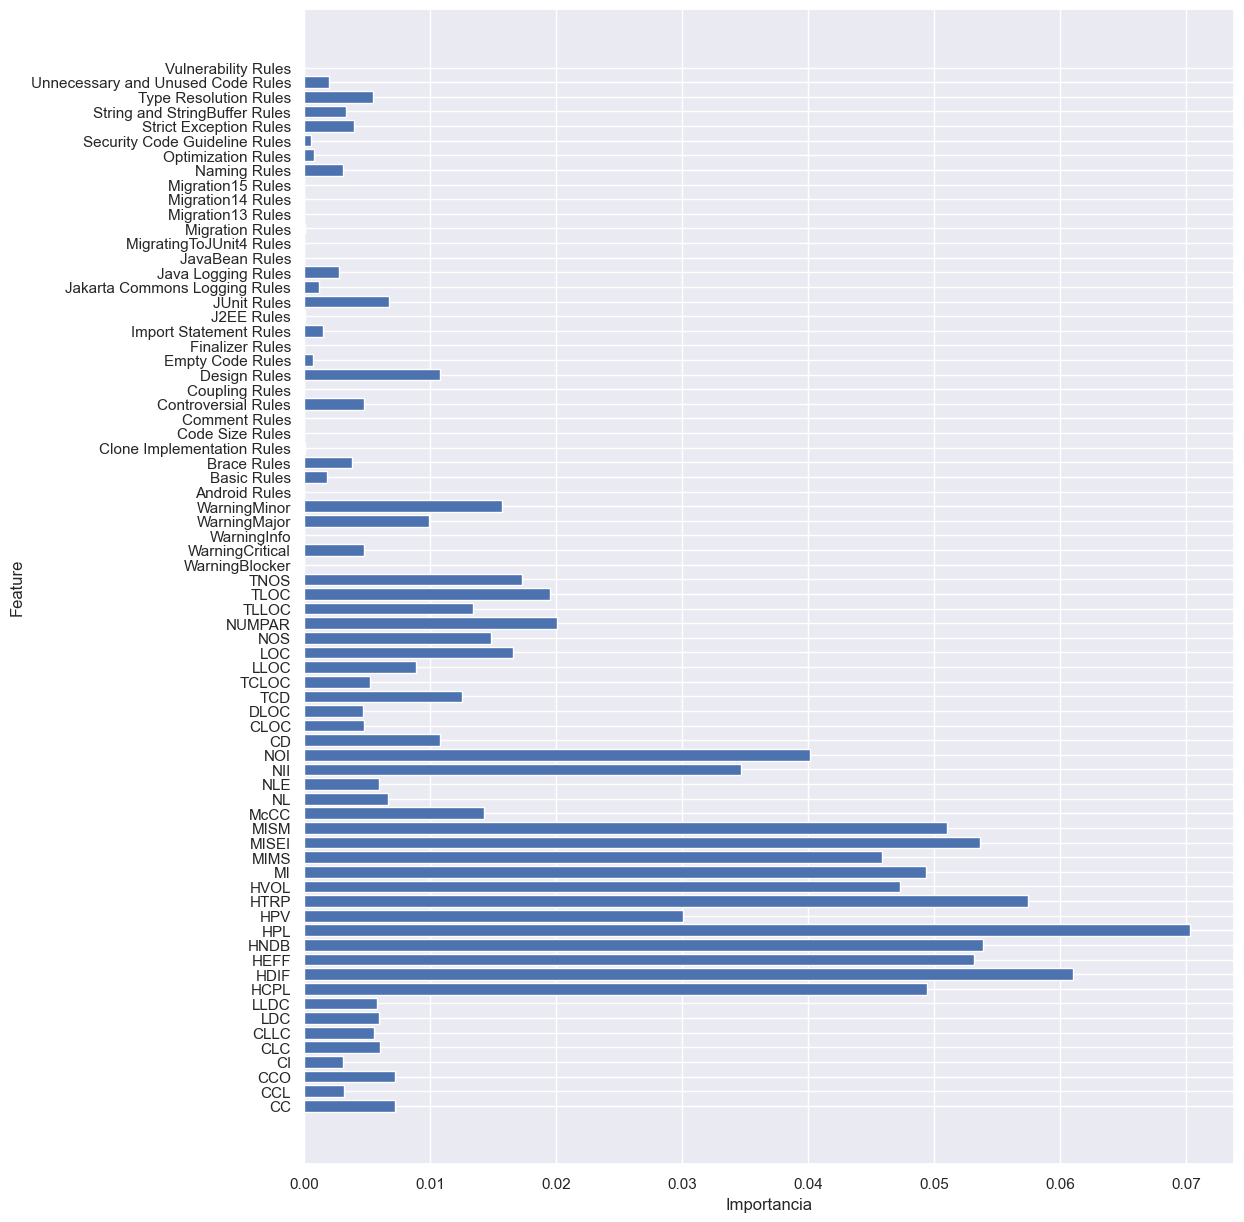

In [22]:
# Importancia de las features sobre el modelo random forest
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
fig, ax = plt.subplots(figsize=(12,15))
ax.barh(range(len(rf.feature_importances_)), rf.feature_importances_)
ax.set_yticks(range(len(x.columns)))
ax.set_yticklabels(x.columns)
ax.set_xlabel("Importancia")
ax.set_ylabel("Feature")
plt.show()
importances = list(rf.feature_importances_)

<Axes: >

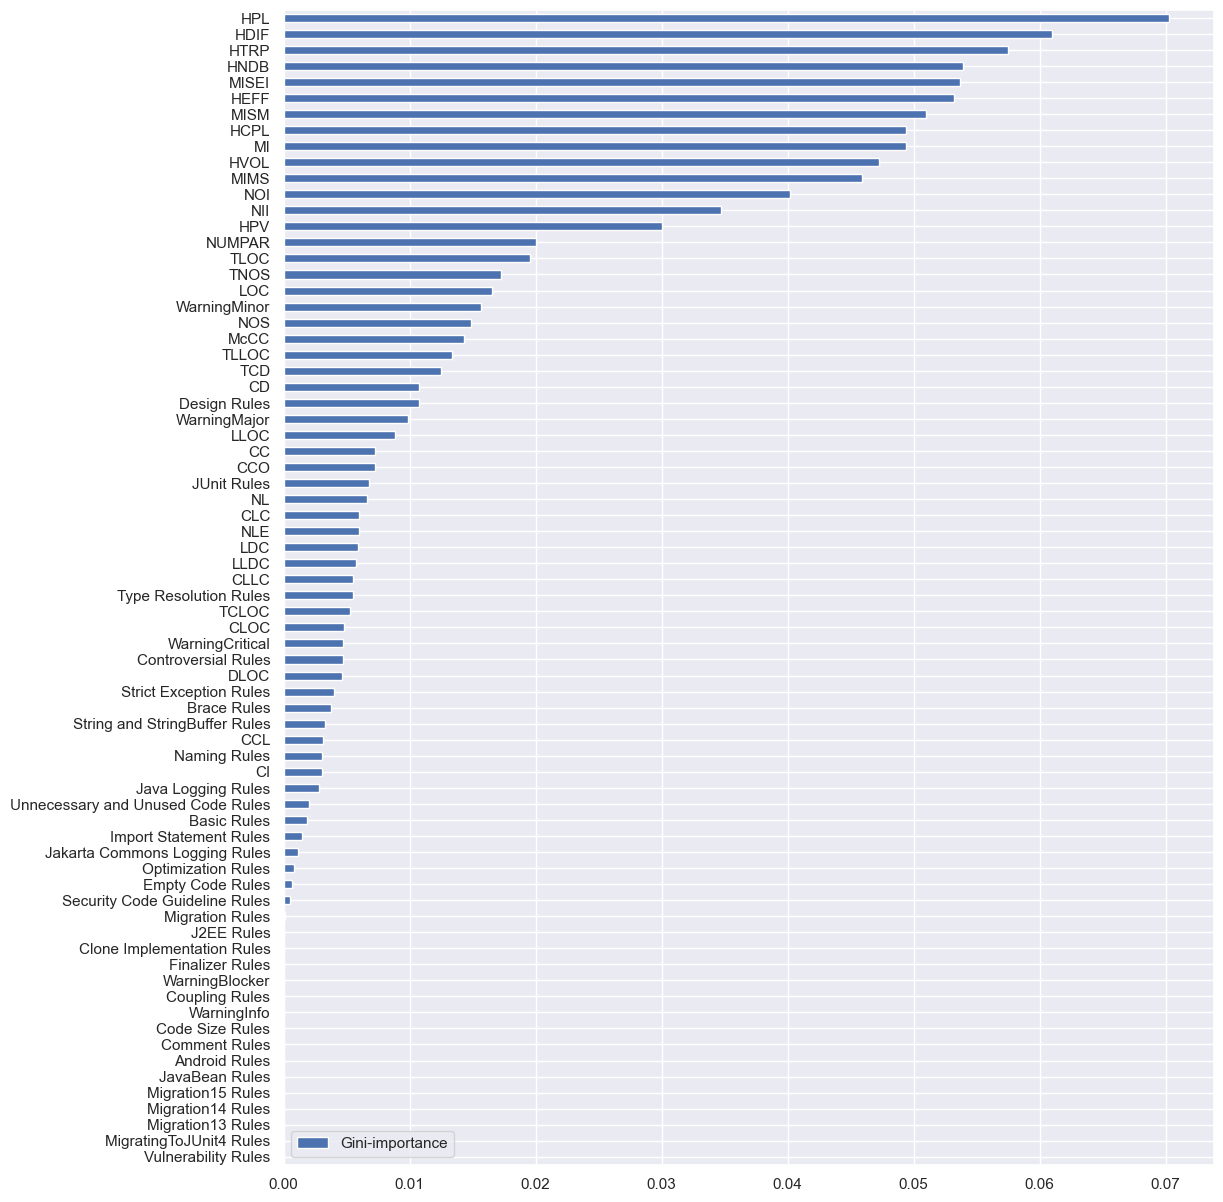

In [23]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='barh', figsize = (12,15))

In [24]:
# features = pd.get_dummies(x.columns)
feature_list = list(x.columns)
# feature_list2 = list(x.columns)
# x.columns
# features
# feature_list
# feature_list2

In [25]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: HPL                  Importance: 0.07030946805947637
Variable: HDIF                 Importance: 0.06099225731620748
Variable: HTRP                 Importance: 0.0574899946265999
Variable: HNDB                 Importance: 0.05390855392372201
Variable: MISEI                Importance: 0.053646818545370886
Variable: HEFF                 Importance: 0.053183262303885336
Variable: MISM                 Importance: 0.05100249671080978
Variable: HCPL                 Importance: 0.04940898625947898
Variable: MI                   Importance: 0.04937483864713924
Variable: HVOL                 Importance: 0.047292074867689986
Variable: MIMS                 Importance: 0.04587408879290259
Variable: NOI                  Importance: 0.04015973447288918
Variable: NII                  Importance: 0.03469001213696037
Variable: HPV                  Importance: 0.030029417193114326
Variable: NUMPAR               Importance: 0.02003420640976876
Variable: TLOC                 Importance: 0.0195192

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

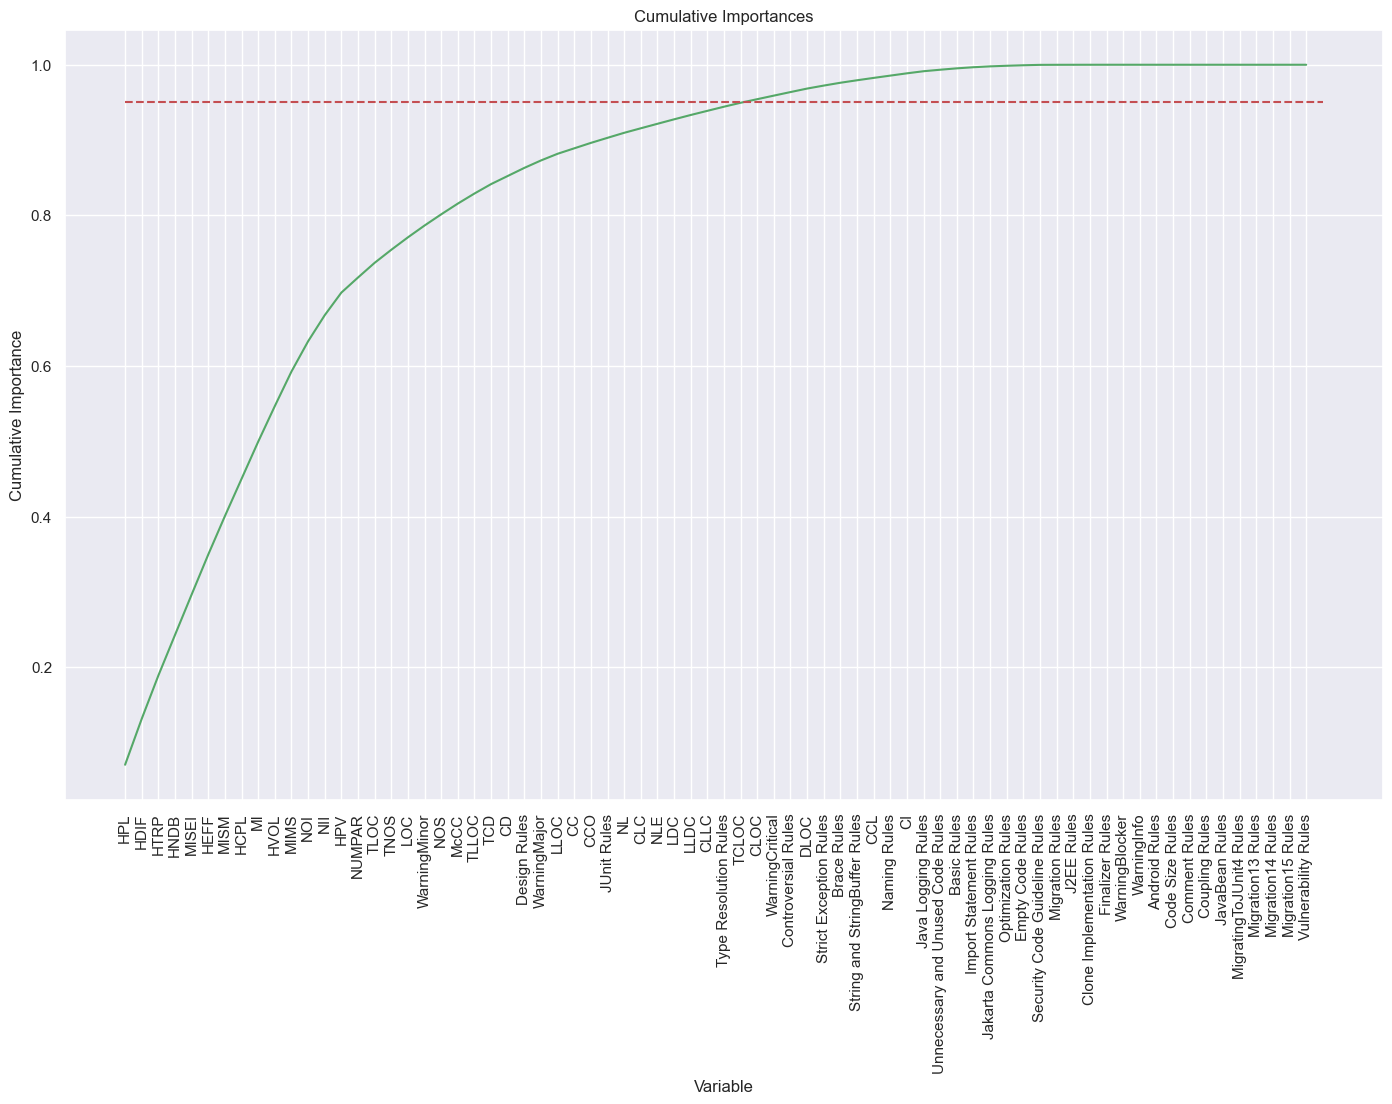

In [26]:
x_values = list(range(len(importances)))
# Lista de features ordenadas por importancia
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Importancia acumulada
cumulative_importances = np.cumsum(sorted_importances)
# Line graph
plt.figure(figsize = (17,10))
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

## Creación del modelo reducido

In [27]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
n_important = np.where(cumulative_importances > 0.95)[0][0] + 1
print('Number of features for 95% importance:', n_important)

# Lista de nombres de las variables mas importantes 
important_feature_names = [feature[0] for feature in feature_importances[0:n_important]]
# Lista de indices de las variables mas importantes 
important_indices = [feature_list.index(feature) for feature in important_feature_names]
print(tuple(zip(important_feature_names, important_indices)))

# Create training and testing sets with only the important features
important_train_features = X_train.iloc[:, important_indices]
important_test_features = X_test.iloc[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Number of features for 95% importance: 39
(('HPL', 12), ('HDIF', 9), ('HTRP', 14), ('HNDB', 11), ('MISEI', 18), ('HEFF', 10), ('MISM', 19), ('HCPL', 8), ('MI', 16), ('HVOL', 15), ('MIMS', 17), ('NOI', 24), ('NII', 23), ('HPV', 13), ('NUMPAR', 33), ('TLOC', 35), ('TNOS', 36), ('LOC', 31), ('WarningMinor', 41), ('NOS', 32), ('McCC', 20), ('TLLOC', 34), ('TCD', 28), ('CD', 25), ('Design Rules', 50), ('WarningMajor', 40), ('LLOC', 30), ('CC', 0), ('CCO', 2), ('JUnit Rules', 55), ('NL', 21), ('CLC', 4), ('NLE', 22), ('LDC', 6), ('LLDC', 7), ('CLLC', 5), ('Type Resolution Rules', 69), ('TCLOC', 29), ('CLOC', 26))
Important train features shape: (86400, 39)
Important test features shape: (21601, 39)


In [28]:
# Modelo reducido
rf_reduced = RandomForestClassifier(max_depth = 35, max_features = n_important, min_samples_split = 3, n_estimators = 500, n_jobs = -1)

# Entrenamiento del modelo
rf_reduced.fit(important_train_features, y_train)

RandomForestClassifier(max_depth=35, max_features=39, min_samples_split=3,
                       n_estimators=500, n_jobs=-1)

### Evaluación rápida del modelo

Accuracy Score: 75.84 %
Predicciones correctas: 16382
              precision    recall  f1-score   support

           0       0.77      0.92      0.84     14851
           1       0.70      0.40      0.51      6750

    accuracy                           0.76     21601
   macro avg       0.74      0.66      0.67     21601
weighted avg       0.75      0.76      0.74     21601



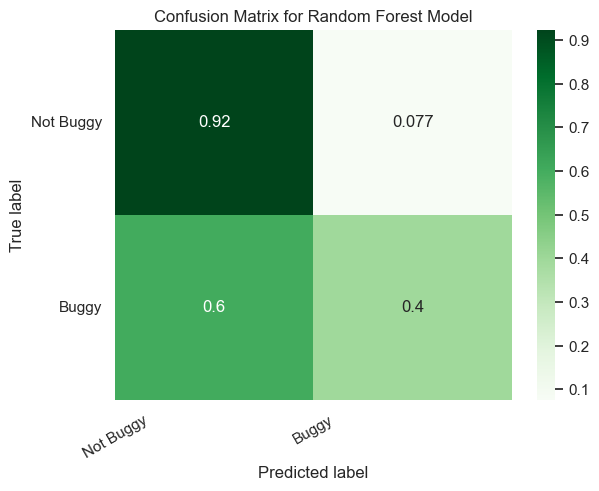

In [29]:
# ACCURACY SCORE
y_pred = rf_reduced.predict(important_test_features)
precision = accuracy_score(y_test, y_pred)
print('Accuracy Score: {:.2f} %'.format(precision * 100))
predicciones_correctas = accuracy_score(y_test, y_pred, normalize=False)
print('Predicciones correctas: {}'.format(predicciones_correctas))

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Confusion matrix usando un heat map
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Greens)

# Labels 
class_names = ['Not Buggy', 'Buggy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=30)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Elección de modelo

In [30]:
# Modelo reducido
rf = rf_reduced
X_train = important_train_features
X_test = important_test_features

# Shap

In [31]:
import shap
import joblib
shap_explainer = shap.TreeExplainer(rf)
shap.initjs()

c:\Users\david\Desktop\bug-prediction-explanation\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Resumen Global

In [32]:
# Plot de resumen global 

# Ejemplo rápido
# shap.summary_plot(shap_explainer.shap_values(X_test.iloc[entry_to_explain-1:entry_to_explain,:]), X_test, plot_type="bar")

# Resumen completo
# shap.summary_plot(shap_explainer.shap_values(X_test), X_test, plot_type="bar")

In [38]:
# Plots para SHAP 
entry_to_explain = 95
print(f'PROBABILIDADES:\n\tNO BUGGY: {rf.predict_proba(X_test)[entry_to_explain, 0]}\n\tBUGGY: {rf.predict_proba(X_test)[entry_to_explain, 1]}')

shap_values = shap_explainer.shap_values(np.array(X_test.iloc[entry_to_explain]))
shap.force_plot(shap_explainer.expected_value[1], shap_values[1], X_test.iloc[entry_to_explain])

PROBABILIDADES:
	NO BUGGY: 0.6241833367733097
	BUGGY: 0.3758166632266903


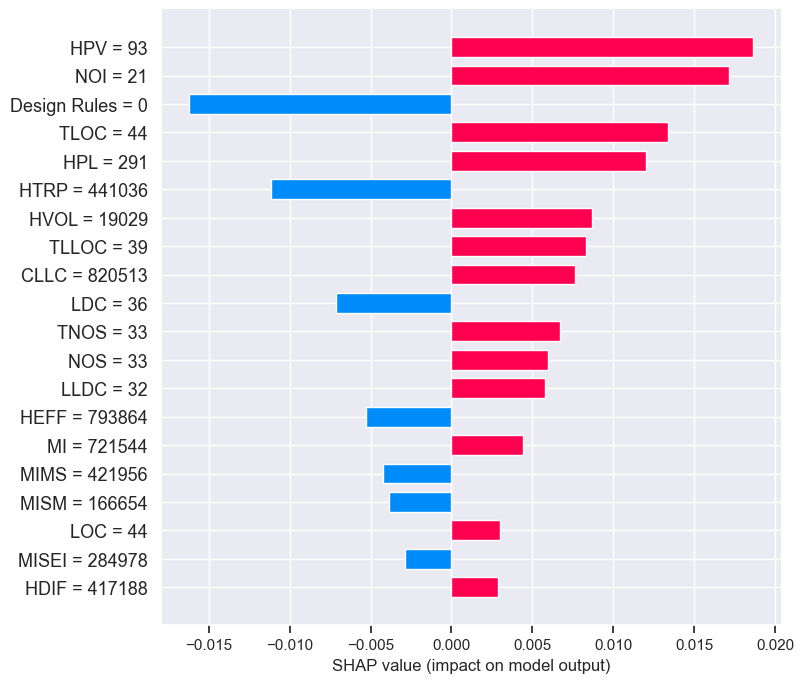

In [39]:
plt.figure(figsize=(8,8))
shap.bar_plot(shap_values[1], features=X_test.iloc[entry_to_explain], max_display=20)

In [40]:
def shap_force_plot(data:pd.DataFrame, exp:shap.TreeExplainer, x:int): 
    for i in range(x): 
        sv = exp.shap_values(np.array(data.iloc[i]))
        shap.force_plot(exp.expected_value[1], sv[1], data.iloc[i], matplotlib=True, show=False)
        plt.savefig(f"./img/shap/{i}_force.png", dpi=200, bbox_inches='tight')
        plt.clf()

def shap_bar_plot(data:pd.DataFrame, exp:shap.TreeExplainer, x:int): 
    plt.figure(figsize=(8,8))
    for i in range(x): 
        sv = exp.shap_values(np.array(data.iloc[i]))
        shap.bar_plot(sv[1], features=data.iloc[i], max_display=20, show=False)
        plt.savefig(f"./img/shap/{i}_bar.png", bbox_inches='tight')
        plt.clf()

# shap_force_plot(data=X_test, exp=shap_explainer, x=100)
# shap_bar_plot(data=X_test, exp=shap_explainer, x=100)

# Lime

In [41]:
import lime
import lime.lime_tabular
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, 
                            feature_names=X_test, discretize_continuous=True)
# exp = explainer.explain_instance(entry_to_explain, rf.predict_proba, num_features=len(X_train.columns), top_labels=1)
exp = lime_explainer.explain_instance(entry_to_explain, rf.predict_proba, num_features=10, top_labels=1)

AttributeError: 'int' object has no attribute 'shape'

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
def lime_explain(X_test:pd.DataFrame, explainer:lime.lime_tabular.LimeTabularExplainer, rf:RandomForestClassifier , x:int): 
    for i in range(x): 
        exp = explainer.explain_instance(X_test.iloc[i], rf.predict_proba, num_features=10, top_labels=1)
        exp.save_to_file(f"./img/lime/{i}.html")

# lime_explain(X_test=X_test, explainer=lime_explainer,rf = rf, x=100)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

KeyboardInterrupt: 

In [ ]:
probabilities = rf.predict_proba(X_test)
print(f"Probabilities: \n5: {probabilities[5]}\n23: {probabilities[23]}\n30: {probabilities[30]}\n47: {probabilities[47]}\n70: {probabilities[70]}\n95: {probabilities[95]}")

Probabilities: 
5: [0.84801542 0.15198458]
23: [0.75714867 0.24285133]
30: [0.96340742 0.03659258]
47: [0.57602563 0.42397437]
70: [0.49713833 0.50286167]
95: [0.56362203 0.43637797]


## Tree schemas
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

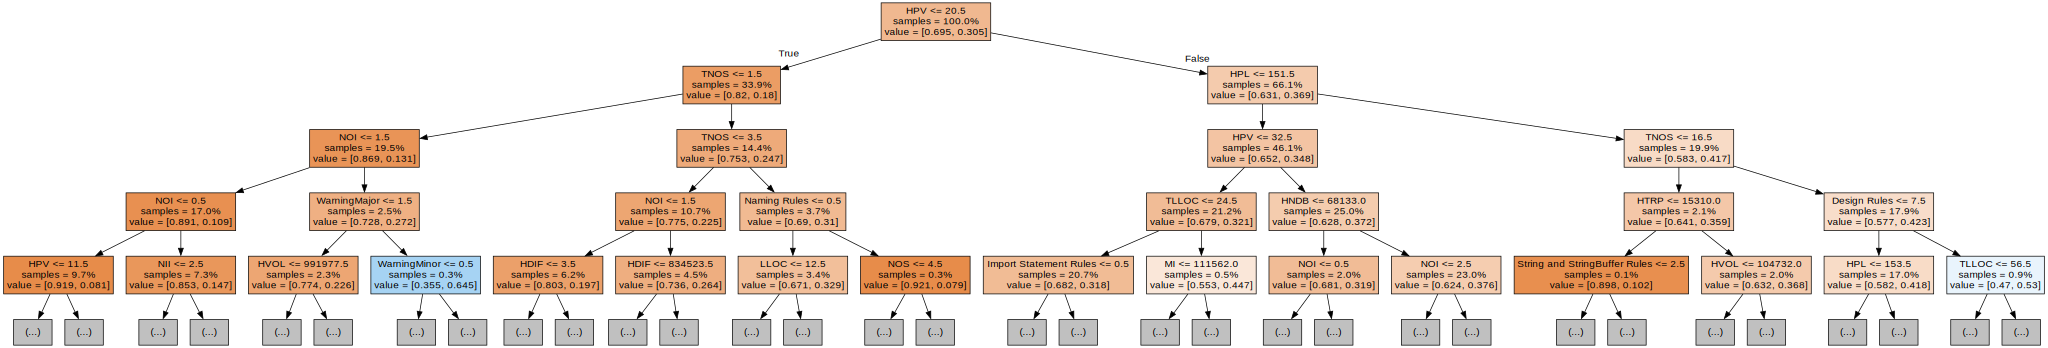

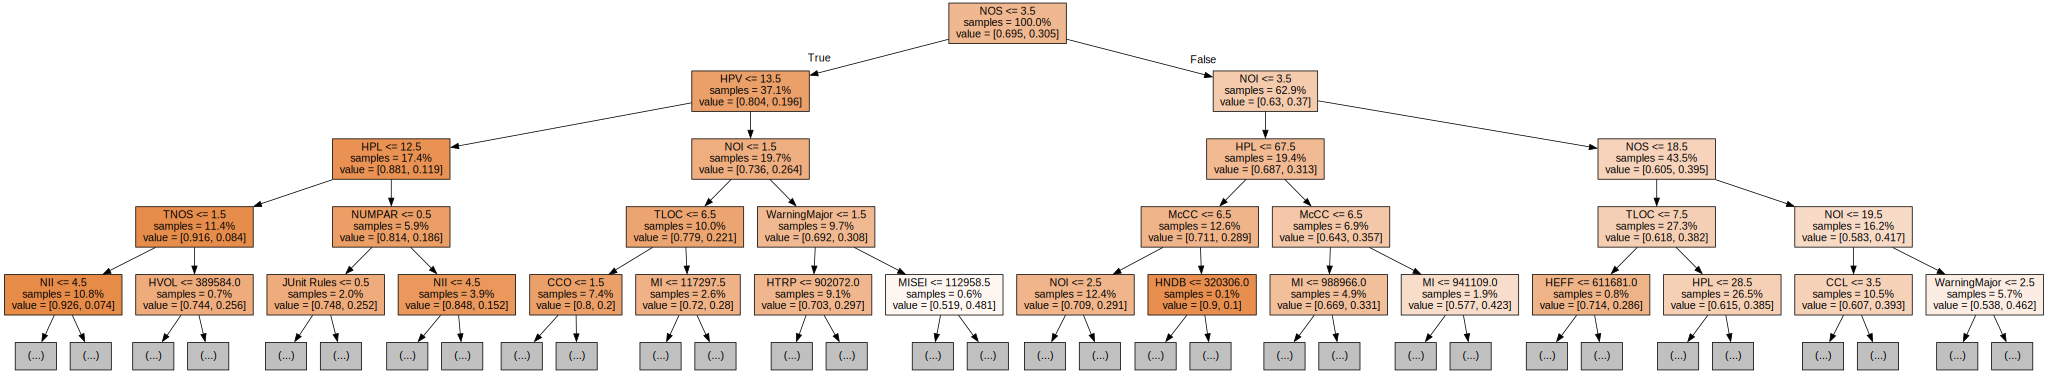

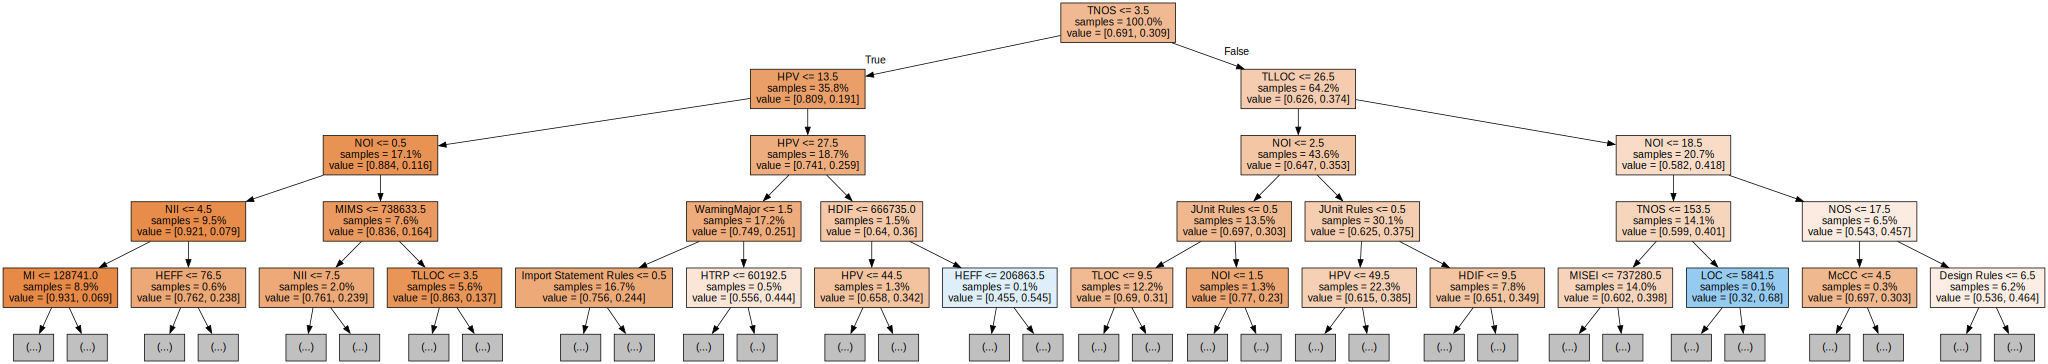

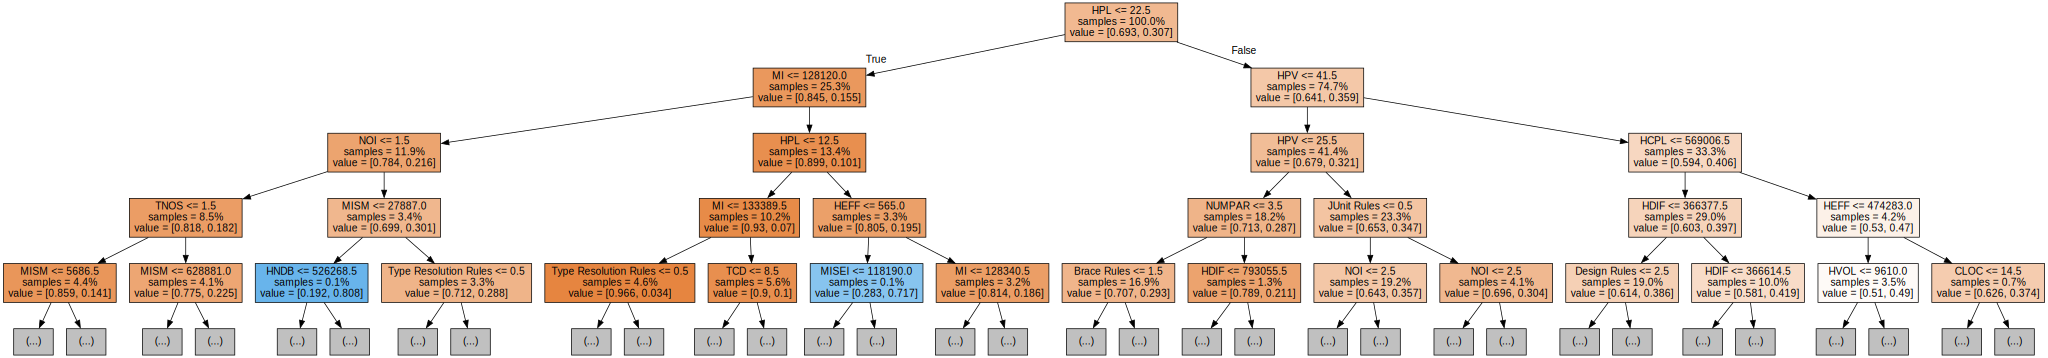

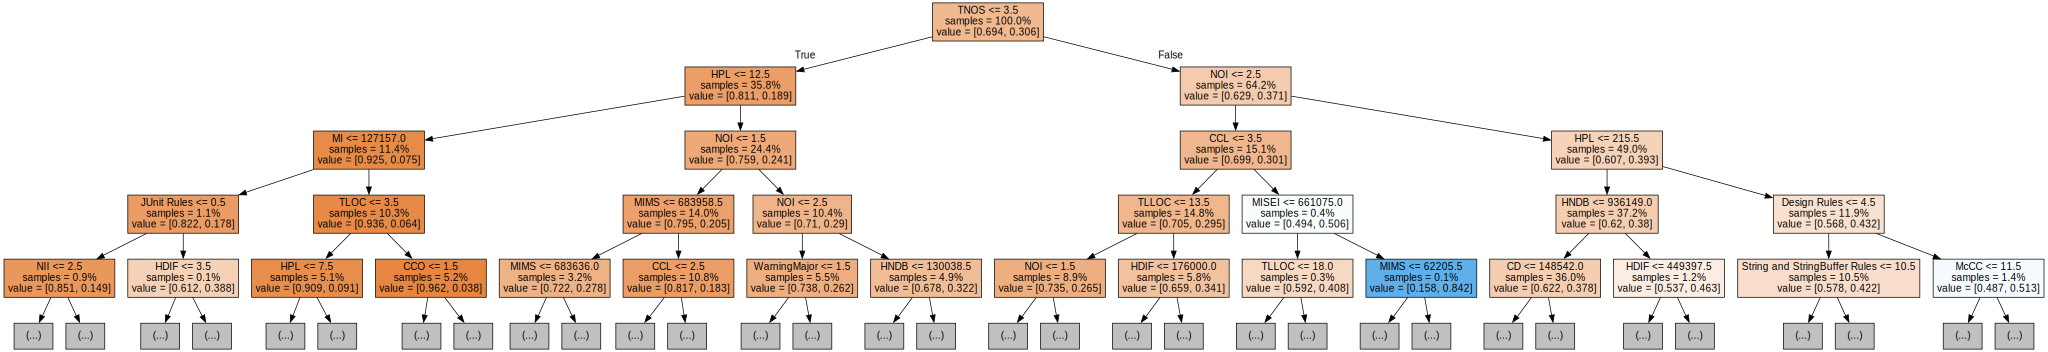

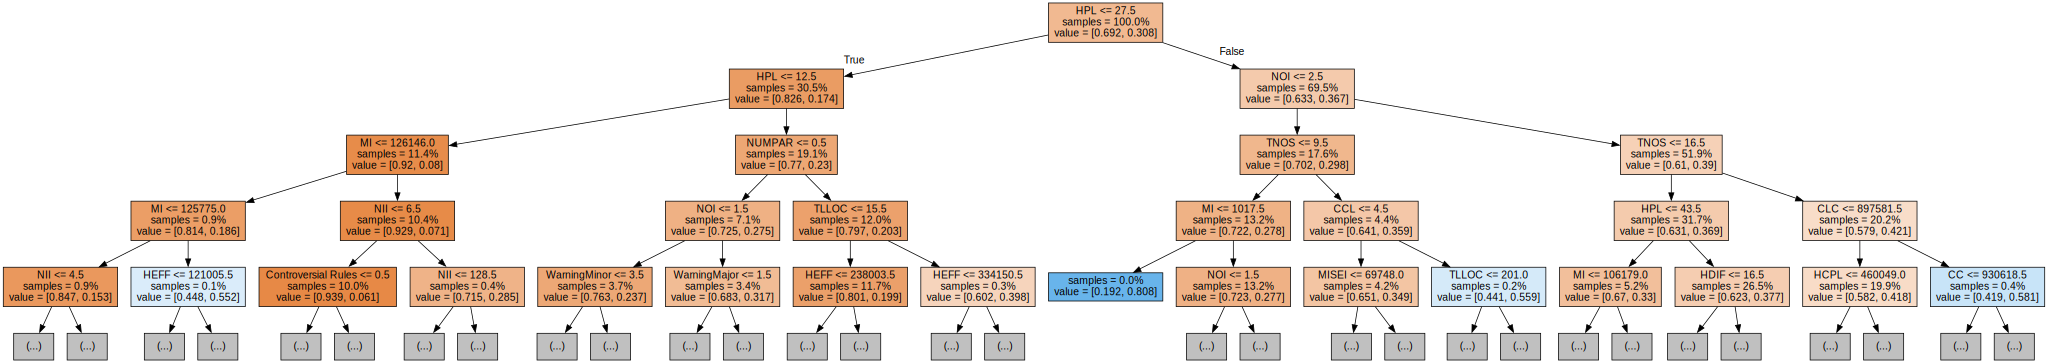

In [ ]:
# Ejectura esta parte si está instalado graphviz en el equipo
# from sklearn.tree import export_graphviz
# import graphviz
# for i in [5, 23, 30, 47, 70, 95]:
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=4, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     graph.render(filename=f'g1.dot')
#     display(graph)

# XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2022)

search_space = {
    "n_estimators": [500, 700],
    "max_depth": [35, 50],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'learning_rate': [0.1, 0.01, 0.05]
}

GS = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv = 5,
                 verbose = 4, 
                 n_jobs=-1)

GS.fit(X_train, y_train)

print(GS.best_params_)
# Fitting 5 folds for each of 120 candidates, totalling 600 fits
# [12:11:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
# Parameters: { "max_features", "min_samples_split" } are not used.

# {'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 50, 'max_features': 72, 'min_samples_split': 3, 'n_estimators': 700}

In [ ]:
# Definición del modelo XGBoost
model = xgb.XGBClassifier()

# Entrenamos el modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Comprobamos la precisión en las predicciones del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión: {:.2f}%'.format(accuracy * 100))


Precisión: 70.08%


# XGBoost with GPU usage

In [ ]:
# Definimos el modelo para actuar con el procesado pro GPU
xgb_gpu = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

# Entrenamos el modelo
xgb_gpu.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb_gpu.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 70.16%
